In [1]:
pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 42.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840626 sha256=3bb1c2e50136d402fb359582d8568265e084266d8e086cedc25785b55bbbafb9
  Stored in directory: /Users/jacky/Library/Caches/pip/wheels/07/a0/a3/d24c94bf043ab5c7e38c30491199a2a11fef8d2584e6df7fb7
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

/Users/jacky/Documents/交大教學/ipynb_demo/.venv/lib/python3.12/site-packages/pyspark/bin/spark-class: line 97: CMD: bad array subscript
head: illegal line count -- -1


PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.

In [4]:
spark

NameError: name 'spark' is not defined

In [5]:
from pyspark.sql.functions import col

In [6]:
df = spark.read.csv("/content/drive/MyDrive/Spark/weatherAUS.csv",header=True,inferSchema=True)


In [7]:
df

DataFrame[Date: string, Location: string, MinTemp: string, MaxTemp: string, Rainfall: string, WindGustDir: string, WindGustSpeed: string, WindDir9am: string, WindDir3pm: string, WindSpeed9am: string, WindSpeed3pm: string, Humidity9am: string, Humidity3pm: string, Pressure9am: string, Pressure3pm: string, Temp9am: string, Temp3pm: string, RainToday: string, RainTomorrow: string]

In [10]:
df.limit(5).show()

+---------+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+-------+-------+---------+------------+
|     Date|Location|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+---------+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+-------+-------+---------+------------+
|12/1/2008|  Albury|   13.4|   22.9|     0.6|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|   16.9|   21.8|       No|          No|
|12/2/2008|  Albury|    7.4|   25.1|       0|        WNW|           44|       NNW|       WSW|           4|          22|         44|         25|     1010.6|     1007.8|   17

In [9]:
df.select("*").show()

+----------+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+-------+-------+---------+------------+
|      Date|Location|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+-------+-------+---------+------------+
| 12/1/2008|  Albury|   13.4|   22.9|     0.6|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|   16.9|   21.8|       No|          No|
| 12/2/2008|  Albury|    7.4|   25.1|       0|        WNW|           44|       NNW|       WSW|           4|          22|         44|         25|     1010.6|     1007.8|

In [14]:
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- Temp9am: string (nullable = true)
 |-- Temp3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



In [15]:
df.show(4,False)

+---------+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+-------+-------+---------+------------+
|Date     |Location|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+---------+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+-------+-------+---------+------------+
|12/1/2008|Albury  |13.4   |22.9   |0.6     |W          |44           |W         |WNW       |20          |24          |71         |22         |1007.7     |1007.1     |16.9   |21.8   |No       |No          |
|12/2/2008|Albury  |7.4    |25.1   |0       |WNW        |44           |NNW       |WSW       |4           |22          |44         |25         |1010.6     |1007.8     |17.2 

In [16]:
df.count()


145460

In [18]:
df.select("Date", "Location", "Rainfall").show(5)


+---------+--------+--------+
|     Date|Location|Rainfall|
+---------+--------+--------+
|12/1/2008|  Albury|     0.6|
|12/2/2008|  Albury|       0|
|12/3/2008|  Albury|       0|
|12/4/2008|  Albury|       0|
|12/5/2008|  Albury|       1|
+---------+--------+--------+
only showing top 5 rows



In [21]:
df.columns

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [23]:
df.select("Date").show(10)

+----------+
|      Date|
+----------+
| 12/1/2008|
| 12/2/2008|
| 12/3/2008|
| 12/4/2008|
| 12/5/2008|
| 12/6/2008|
| 12/7/2008|
| 12/8/2008|
| 12/9/2008|
|12/10/2008|
+----------+
only showing top 10 rows



In [24]:
df.select("Location","Date").show(10)

+--------+----------+
|Location|      Date|
+--------+----------+
|  Albury| 12/1/2008|
|  Albury| 12/2/2008|
|  Albury| 12/3/2008|
|  Albury| 12/4/2008|
|  Albury| 12/5/2008|
|  Albury| 12/6/2008|
|  Albury| 12/7/2008|
|  Albury| 12/8/2008|
|  Albury| 12/9/2008|
|  Albury|12/10/2008|
+--------+----------+
only showing top 10 rows



In [25]:
df.select("Location","Date").limit(5).show()

+--------+---------+
|Location|     Date|
+--------+---------+
|  Albury|12/1/2008|
|  Albury|12/2/2008|
|  Albury|12/3/2008|
|  Albury|12/4/2008|
|  Albury|12/5/2008|
+--------+---------+



## How to filter out some data:

We will do as we do in SQL we will use where

In [26]:
df.where((df.Rainfall > 25)& (df.Location=="Albury")).limit(5).show()

+----------+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+-------+-------+---------+------------+
|      Date|Location|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+-------+-------+---------+------------+
| 9/23/2009|  Albury|    9.3|   16.8|    28.8|          W|           56|         W|       WSW|          26|          30|         82|         54|      997.8|     1003.8|   13.1|   15.9|      Yes|         Yes|
|  2/5/2010|  Albury|   19.2|   26.1|    52.2|         SE|           33|         S|       SSW|           9|          13|         83|         70|     1009.9|     1009.4|

## How to aggregate the data:


In [31]:
#df.groupBy("MinTemp").agg({"WindDir9am":"WSW"})

## How to create a new temp view :

If we want to create a new temp view and load the data frame on it

In [32]:
df.createOrReplaceTempView("WeatherAUS")

## A good feature of Spark is that we can use SQL syntax by using Spark.sql

In [33]:
spark.sql("select * from WeatherAUS").show()

+----------+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+-------+-------+---------+------------+
|      Date|Location|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+-------+-------+---------+------------+
| 12/1/2008|  Albury|   13.4|   22.9|     0.6|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|   16.9|   21.8|       No|          No|
| 12/2/2008|  Albury|    7.4|   25.1|       0|        WNW|           44|       NNW|       WSW|           4|          22|         44|         25|     1010.6|     1007.8|

## 1-  Use !wget to download the dataset to the server

Colab is actually a Centos virtual machine with GPU. You can directly use the linux wget command to download the dataset to the server. The default is to download to the /content path

Download and unzip the dataset command:

In [ ]:
#!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
#!unzip hymenoptera_data.zip -d ./

Load dataset command:



In [ ]:
# Define the dataset using ImageFolder
# define data preprocessing
#train_tf = tfs.Compose([
 #  tfs.RandomResizedCrop(224),
 #  tfs.RandomHorizontalFlip(),
 #  tfs.ToTensor(),
 #  tfs.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # Use ImageNet mean and variance
#])
#train_set = ImageFolder('./hymenoptera_data/train/', train_tf)

## 2- Loading data into PySpark from github
Spark has a variety of modules to read data of different formats. It also automatically determines the data type for each column, but it has to go over it once.

For this article, I have created a sample JSON dataset in Github. You can download the file directly into Colab using the ‘wget’ command like this:

In [ ]:
#!wget --continue https://raw.githubusercontent.com/GarvitArya/pyspark-
#demo/main/sample_books.json -O /tmp/sample_books.json

Now read this file into a Spark dataframe using the read module.

In [ ]:
#df = spark.read.json("/tmp/sample_books.json")


# 3- Use Google Cloud Disk to load datasets





First, the command to mount Google Cloud Disk in Colab is as follows. After execution, you will be asked to enter the key of your Google account to mount

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

Upload the file to Google Drive, such as data/data.csv. One way to upload is to upload manually, the other is to download to Google Cloud Disk through the wget command, and then load it for use

The advantage of storing in Google Cloud Disk is that the data will not be lost the next time you connect like the first method. The disadvantage is that The Google cloud disk is only 15g, which is not suitable for large data sets. The command to download the data set to the Google cloud disk is as follows:

In [ ]:
#import os
#Change the current working directory to the path of Google Cloud Drive
#path="/content/drive/My Drive/Colab Notebooks/"
#os.chdir(path)
#os.listdir(path)
#Use the wget command to download the dataset to this path
#!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/data.csv

Load dataset



In [ ]:
#train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/data.csv')


## 4. Load dataset from kaggle

If you are playing a game on kaggle, the data set you need is prepared on it, and you can download it directly using the kaggle command. You need to choose to create an api token in the my profile of kaggle, and then generate the username and key locally

In [ ]:
#{"username":"gongenbo","key":"f26dfa65d06321a37f6b8502cd6b8XXX"}


Command to download data via kaggle

In [ ]:
#!pip install -U -q kaggle
#!mkdir -p ~/.kaggle
#!echo '{"username":"gongenbo","key":"f26dfa65d06321a37f6b8502cd6b8XXX"}' > ~/.kaggle/kaggle.json
#!chmod 600 ~/.kaggle/kaggle.json
#!kaggle competitions download -c state-farm-distracted-driver-detection

Command to submit scores to kaggle after training



In [ ]:
#!kaggle competitions submit -c state-farm-distracted-driver-detection -f submission.csv -m "Message"


## 5. Upload to disk using the upload button

Google provides 67G of disk space. Use the upload button to upload the image below. This method is suitable for small datasets or own datasets:

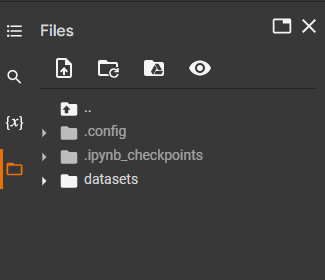

## 6-There is a library in jovian called open datasets.

First, install it into colab using-
The URL can be any link be it google or kaggle links.



In [ ]:
#!pip install opendatasets --upgrade
#import opendatasets as od
#dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset'
#od.download(dataset_url)

Reference:

https://stackoverflow.com/questions/71619540/how-to-upload-a-62-gb-datasets-to-google-colab
https://blog.devgenius.io/get-started-with-pyspark-and-google-colab-notebook-in-4-minutes-94b4e2cecad7

If you have any question feel free to ask, stay tuned to next works


**Author :Parissan Ahmadi**

Linkdin : https://www.linkedin.com/in/parisan-ahmadi-1410a0a9/

Github : https://github.com/parisa-ahmadi

TelegramChannel : https://t.me/AIwithParissan

Happy Learning!

Stick To The Plan ✌